## Лузина Владимира РИС22-2
# Семинар 7. Сравнение наборов данных

Используя имеющиеся статистические данные выполнить следующие шаги:
1) Построить три однопараметрические регрессионные модели (линейная, параболическая и экспоненциальная)
2) Для каждой модели рассчитать статистические показатели и интерпретировать их.
3) Проверить выбранные гипотезы с помощью правила q/2q/3q и сделать выводы об их принятии или не принятии.
4) Построить box-plot и скрипичную диаграммы для визуального сравнения гипотез со статистическими данными.

Я не стал удалять выбросы, так как это не связано с текущей задачей

In [1109]:
import math
import pandas as pd
import numpy as np
import sklearn.metrics as mtr
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


Исходные данные взяты так, чтобы параболическая модель была самой точной

In [1110]:
df = pd.DataFrame({'day': [i for i in range(1, 21)],  # дни с 1 по 20
                   'price': [2.61,5.45,2.88,4.28,2.47,4.57,0.15,0.38,1.10,2.43,1.23,5.93,1.44,1.28,1.43,1.90,1.96,2.08,3.88,4.41],  # стоимость
                   'amount': [46,55,53,43,61,48,198,151,115,43,137,89,134,97,90,133,97.,67,60,55]})  # число продаж

df

,day,price,amount
0,1,2.61,46.0
1,2,5.45,55.0
2,3,2.88,53.0
3,4,4.28,43.0
4,5,2.47,61.0
5,6,4.57,48.0
6,7,0.15,198.0
7,8,0.38,151.0
8,9,1.10,115.0
9,10,2.43,43.0


### Cтатистические показатели

MAE (mean absolute error — средняя абсолютная ошибка)
RMSE (root mean square error — среднеквадратичная ошибка)
MAPE (mean percentage absolute error — средняя абсолютная ошибка в процентах)
D (r2 score - детерминационное отношение)

#### Линейная модель

Согласно определению функции должно быть однозначное соответствие значений осей абсцисс и ординат. Для
этого удалим дублирующие значения цен, оставив повторяющиеся значения количества продаж
 (также возможно заменить их средними значениями).


In [1111]:
df_without_day = df.drop("day", axis=1)

In [1112]:
df_unique_amounts = df_without_day.drop_duplicates(subset=['price'])

Создадим вспомогательную матрицу A,
Где каждому значению A, каждый из которых 1, соответствует цена

In [1113]:
A =  df_unique_amounts.drop("amount", axis=1)
A["A"] = [1 for i in range(len(A))]
temp = A["price"]
A = A.drop("price", axis=1)
A["price"] = temp
A

,A,price
0,1,2.61
1,1,5.45
2,1,2.88
3,1,4.28
4,1,2.47
5,1,4.57
6,1,0.15
7,1,0.38
8,1,1.10
9,1,2.43


Также создадим вектор цен y, соответствующих уникальным количествам продаж

In [1114]:
y = df_unique_amounts["amount"]
y

0      46.0
1      55.0
2      53.0
3      43.0
4      61.0
5      48.0
6     198.0
7     151.0
8     115.0
9      43.0
10    137.0
11     89.0
12    134.0
13     97.0
14     90.0
15    133.0
16     97.0
17     67.0
18     60.0
19     55.0
Name: amount, dtype: float64

Вычисляем значения коэффициентов по формуле
$c = ((A^T*A)^{-1}*A^T)*y$

In [1115]:
c = (np.linalg.inv(A.T @ A) @ A.T) @ y
c

0    136.333855
1    -18.408737
dtype: float64

Окончательно запишем искомую функцию

In [1116]:
print(f"f(x) = {c[1]}*x + {c[0]}")

f(x) = -18.408736953693467*x + 136.33385492092717


Коэффициент $c_1$ показывает значение f(x) при x = 0. Из значения этого коэффициента можно сделать вывод, что при нулевой цене количество продаж будет примерно 136
Коэффициент $c_2$ показывает, на сколько единиц в среднем изменится f(x), если x изменится на одну единицу. Из
рассмотренного примера можно сделать вывод, что уменьшение цены на 1 приводит к
уменьшению объема продаж на 18 единиц продукции.

In [1117]:
def linear_regression(x: int) -> float:
    return c[1]*x + c[0]

Cделаем предикт

In [1118]:
amount_pred = pd.Series([linear_regression(i) for i in df["price"]])
amount_pred

0      88.287051
1      36.006239
2      83.316692
3      57.544461
4      90.864275
5      52.205927
6     133.572544
7     129.338535
8     116.084244
9      91.600624
10    113.691108
11     27.170045
12    109.825274
13    112.770672
14    110.009361
15    101.357255
16    100.252730
17     98.043682
18     64.907956
19     55.151325
dtype: float64

#### Cтатистические показатели

#### MAE (mean absolute error — средняя абсолютная ошибка)


In [1119]:
MAE = mtr.mean_absolute_error(df["amount"], amount_pred)
MAE

24.60390005503782

Интерпретация
Насколько в среднем отклоняется объём продаж реальный от моделируемых
В среднем прогнозируемый объём продаж отклоняется на 17 единиц
линейная шкала более наглядна при сравнении точности моделей на разных масштабах данных. 
Кроме этого, абсолютная ошибка оказывается менее чувствительна к выбросам в данных, чем среднеквадратическая.

#### RMSE (root mean square error — среднеквадратичная ошибка - Сигма остаточное) 


In [1120]:
RMSE = mtr.root_mean_squared_error(df["amount"], amount_pred)
RMSE

30.636494954144045

Интерпретация
Насколько в среднем отклоняется объём продаж реальный от моделируемых
В среднем прогнозируемый объём продаж отклоняется на 31
так как каждое отклонение возводится в квадрат, любое небольшое отклонение может значительно повлиять на показатель ошибки

#### MAPE (mean percentage absolute error — средняя абсолютная ошибка в процентах)


In [1121]:
MAPE = mtr.mean_absolute_percentage_error(df["amount"], amount_pred)
MAPE

0.3305058020090107

Интерпретация
Вероятность ошибки
Вероятность ошибки при прогнозировании будет 0.33
Основная проблема данной ошибки — нестабильность.

#### D (детерминационное отношение)

In [1122]:
coef_determ = mtr.r2_score(df["amount"], amount_pred)
coef_determ

0.48245154610579666

Интерпретация
Вероятность правильного ответа
Вероятность правильного ответа при прогнозировании 0.48

#### Проверка значимости

F опытное 

In [1123]:
m = 1
n = len(df)
f_op = coef_determ/(1-coef_determ) * ((n - m - 1) / m)
f_op

16.779352280085334

F критическое (alpha = 0.05)

In [1124]:
m = 1
n = len(df)
a = 0.05
f_crit = scipy.stats.f.ppf(q=1-a, dfn = n, dfd = n-m-1)
f_crit

2.1906479255678026

In [1125]:
if f_op > f_crit:
    print("Модель значима, значит её можно использовать в прогнозировании")
else:
    print("Модель НЕ значима, значит её НЕЛЬЗЯ использовать в прогнозировании")

Модель значима, значит её можно использовать в прогнозировании


### Проверка гипотез S/2S/3S

In [1126]:
std = df["amount"].std()
std

43.691984089581126

Найдём, попадают ли найденные значения в интервалы от +-S до +-3S
True - попадают, False - нет

In [1127]:
is_in_intervals = pd.DataFrame({
    "S": [df["amount"].iloc[i] - std < amount_pred.iloc[i] < df["amount"].iloc[i] + std for i in range(len(amount_pred))],
    "2S": [df["amount"].iloc[i] - 2*std < amount_pred.iloc[i] < df["amount"].iloc[i] + 2*std for i in range(len(amount_pred))],
    "3S": [df["amount"].iloc[i] - 3*std < amount_pred.iloc[i] < df["amount"].iloc[i] + 3*std for i in range(len(amount_pred))]})
is_in_intervals

,S,2S,3S
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,False,True,True
7,True,True,True
8,True,True,True
9,False,True,True


Найдём процент попаданий для каждого S

In [1128]:
hit_accuracy = pd.DataFrame({
    "S": [((is_in_intervals[is_in_intervals["S"]]["S"].count() / is_in_intervals["S"].count())*100).astype(str)+'%'],
    "2S": [((is_in_intervals[is_in_intervals["2S"]]["2S"].count() / is_in_intervals["2S"].count())*100).astype(str)+'%'],
    "3S": [((is_in_intervals[is_in_intervals["3S"]]["3S"].count() / is_in_intervals["3S"].count())*100).astype(str)+'%']})
hit_accuracy

,S,2S,3S
0,85.0%,100.0%,100.0%


S должна быть больше 68%, 2S больше 95% и 3S 99.7%
В нашем случае частотность превышает пороговые значения
Значит прогноз удачный и достаточно велик для точного прогноза

### Параболическая модель
$y = c_1 + c_2*s + c_3*x**2$

Создадим вспомогательную матрицу A,
Где каждому значению A, каждый из которых 1, соответствует цена и квадрат цены

In [1129]:
A =  df_unique_amounts.drop("amount", axis=1)
A["A"] = [1 for i in range(len(A))]
temp = A["price"].copy()
A = A.drop("price", axis=1)
A["price"] = temp
A["price_sqr"] = temp**2
A

,A,price,price_sqr
0,1,2.61,6.8121
1,1,5.45,29.7025
2,1,2.88,8.2944
3,1,4.28,18.3184
4,1,2.47,6.1009
5,1,4.57,20.8849
6,1,0.15,0.0225
7,1,0.38,0.1444
8,1,1.10,1.2100
9,1,2.43,5.9049


Также создадим вектор цен y, соответствующих уникальным количествам продаж

In [1130]:
y = df_unique_amounts["amount"]
y

0      46.0
1      55.0
2      53.0
3      43.0
4      61.0
5      48.0
6     198.0
7     151.0
8     115.0
9      43.0
10    137.0
11     89.0
12    134.0
13     97.0
14     90.0
15    133.0
16     97.0
17     67.0
18     60.0
19     55.0
Name: amount, dtype: float64

Вычисляем значения коэффициентов по формуле
$c = ((A^T*A)^{-1}*A^T)*y$

In [1131]:
c = (np.linalg.inv(A.T @ A) @ A.T) @ y
c

0    198.078578
1    -77.167815
2      9.738055
dtype: float64

Окончательно запишем искомую функцию

In [1132]:
print(f"f(x) = {c[2]}*x^2 + {c[1]}*x + {c[0]}")

f(x) = 9.738054727085169*x^2 + -77.1678148038748*x + 198.07857814300917


Интерпретация
Продаём бесплатно - C1
При изменении цены на 1 единицу нужно найти производную из функции и подставить x
$y = c_2 + s*c_3*x$

In [1133]:
def parabola_regression(x: int) -> float:
    return c[2]*x*x + c[1]*x + c[0]

In [1134]:
amount_pred_parab = pd.Series([parabola_regression(i) for i in df["price"]])
amount_pred_parab

0      63.007184
1      66.758558
2      56.606593
3      46.185912
4      66.884974
5      48.799964
6     186.722512
7     170.160984
8     124.977028
9      68.063028
10    117.894869
11     82.911157
12    107.149755
13    115.258604
14    107.641951
15     86.614108
16     84.239372
17     79.700243
18     45.268028
19     47.155177
dtype: float64

#### Cтатистические показатели

#### MAE (mean absolute error — средняя абсолютная ошибка)


In [1135]:
MAE = mtr.mean_absolute_error(df["amount"], amount_pred_parab)
MAE

14.504502224877962

Интерпретация
Насколько в среднем отклоняется объём продаж реальный от моделируемых
В среднем прогнозируемый объём продаж отклоняется на 15 единиц
линейная шкала более наглядна при сравнении точности моделей на разных масштабах данных. 
Кроме этого, абсолютная ошибка оказывается менее чувствительна к выбросам в данных, чем среднеквадратическая.

#### RMSE (root mean square error — среднеквадратичная ошибка - Сигма остаточное) 


In [1136]:
RMSE = mtr.root_mean_squared_error(df["amount"], amount_pred_parab)
RMSE

17.649282834756214

Интерпретация
Насколько в среднем отклоняется объём продаж реальный от моделируемых
В среднем прогнозируемый объём продаж отклоняется на 18
так как каждое отклонение возводится в квадрат, любое небольшое отклонение может значительно повлиять на показатель ошибки

#### MAPE (mean percentage absolute error — средняя абсолютная ошибка в процентах)


In [1137]:
MAPE = mtr.mean_absolute_percentage_error(df["amount"], amount_pred_parab)
MAPE

0.17714004855112192

Интерпретация
Вероятность ошибки
Вероятность ошибки при прогнозировании будет 0.18
Основная проблема данной ошибки — нестабильность.

#### D (детерминационное отношение)

In [1138]:
coef_determ = mtr.r2_score(df["amount"], amount_pred_parab)
coef_determ

0.8282380401969516

Интерпретация
Вероятность правильного ответа
Вероятность правильного ответа при прогнозировании 0.83

#### Проверка значимости

F опытное 

In [1139]:
m = 1
n = len(df)
f_op = coef_determ/(1-coef_determ) * ((n - m - 1) / m)
f_op

86.79619597167951

F критическое (alpha = 0.05)

In [1140]:
m = 1
n = len(df)
a = 0.05
f_crit = scipy.stats.f.ppf(q=1-a, dfn = n, dfd = n-m-1)
f_crit

2.1906479255678026

In [1141]:
if f_op > f_crit:
    print("Модель значима, значит её можно использовать в прогнозировании")
else:
    print("Модель НЕ значима, значит её НЕЛЬЗЯ использовать в прогнозировании")

Модель значима, значит её можно использовать в прогнозировании


### Проверка гипотез S/2S/3S

In [1142]:
std = df["amount"].std()
std

43.691984089581126

Найдём, попадают ли найденные значения в интервалы от +-S до +-3S
True - попадают, False - нет

In [1143]:
is_in_intervals = pd.DataFrame({
    "S": [df["amount"].iloc[i] - std < amount_pred_parab.iloc[i] < df["amount"].iloc[i] + std for i in range(len(amount_pred_parab))],
    "2S": [df["amount"].iloc[i] - 2*std < amount_pred_parab.iloc[i] < df["amount"].iloc[i] + 2*std for i in range(len(amount_pred_parab))],
    "3S": [df["amount"].iloc[i] - 3*std < amount_pred_parab.iloc[i] < df["amount"].iloc[i] + 3*std for i in range(len(amount_pred_parab))]})
is_in_intervals

,S,2S,3S
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,True,True,True
7,True,True,True
8,True,True,True
9,True,True,True


Найдём процент попаданий для каждого S

In [1144]:
hit_accuracy = pd.DataFrame({
    "S": [((is_in_intervals[is_in_intervals["S"]]["S"].count() / is_in_intervals["S"].count())*100).astype(str)+'%'],
    "2S": [((is_in_intervals[is_in_intervals["2S"]]["2S"].count() / is_in_intervals["2S"].count())*100).astype(str)+'%'],
    "3S": [((is_in_intervals[is_in_intervals["3S"]]["3S"].count() / is_in_intervals["3S"].count())*100).astype(str)+'%']})
hit_accuracy

,S,2S,3S
0,95.0%,100.0%,100.0%


S должна быть больше 68%, 2S больше 95% и 3S 99.7%
В нашем случае частотность превышает пороговые значения
Значит прогноз удачный и достаточно велик для точного прогноза

### Экспоненциальная модель
$y = c_1*e^{(C_2*x)}$

Линеализация
$ln(y) = ln(c_1) + ln(c_2)$

Создадим вспомогательную матрицу A,
Где каждому значению A, каждый из которых 1, соответствует цена

In [1145]:
A =  df_unique_amounts.drop("amount", axis=1)
A["A"] = [1 for i in range(len(A))]
temp = A["price"]
A = A.drop("price", axis=1)
A["price"] = temp
A

,A,price
0,1,2.61
1,1,5.45
2,1,2.88
3,1,4.28
4,1,2.47
5,1,4.57
6,1,0.15
7,1,0.38
8,1,1.10
9,1,2.43


Также создадим вектор логарифмов цен y, соответствующих уникальным количествам продаж

In [1146]:
y = df_unique_amounts["amount"].apply(lambda x: math.log(x))
y

0     3.828641
1     4.007333
2     3.970292
3     3.761200
4     4.110874
5     3.871201
6     5.288267
7     5.017280
8     4.744932
9     3.761200
10    4.919981
11    4.488636
12    4.897840
13    4.574711
14    4.499810
15    4.890349
16    4.574711
17    4.204693
18    4.094345
19    4.007333
Name: amount, dtype: float64

Вычисляем значения коэффициентов по формуле
$c = ((A^T*A)^{-1}*A^T)*y$

In [1147]:
c = (np.linalg.inv(A.T @ A) @ A.T) @ y
c

0    4.881798
1   -0.195186
dtype: float64

Окончательно запишем искомую функцию

In [1148]:
print(f"f(x) = e^{c[0]}*e^({c[1]}*x)")

f(x) = e^4.881798424603269*e^(-0.19518587883793193*x)


Интерпретация
Продаём бесплатно - C1
При изменении цены на 1 единицу нужно найти производную из функции и подставить x
$y = c_1*c_2*e^{C_2*x}$

In [1149]:
def exp_regression(x: int) -> float:
    return  math.e**c[0] * math.e ** (c[1] * x)

Cделаем предикт

In [1150]:
amount_pred_exp = pd.Series([exp_regression(i) for i in df["price"]])
amount_pred_exp

0      79.230655
1      45.514702
2      75.163301
3      57.191361
4      81.425566
5      54.044023
6     128.062771
7     122.440817
8     106.388124
9      82.063779
10    103.722576
11     41.444126
12     99.557041
13    102.715240
14     99.751552
15     91.007803
16     89.948214
17     87.865901
18     61.835474
19     55.758435
dtype: float64

#### Cтатистические показатели

#### MAE (mean absolute error — средняя абсолютная ошибка)


In [1151]:
MAE = mtr.mean_absolute_error(df["amount"], amount_pred_exp)
MAE

22.74795565392154

Интерпретация
Насколько в среднем отклоняется объём продаж реальный от моделируемых
В среднем прогнозируемый объём продаж отклоняется на 23 единиц
линейная шкала более наглядна при сравнении точности моделей на разных масштабах данных. 
Кроме этого, абсолютная ошибка оказывается менее чувствительна к выбросам в данных, чем среднеквадратическая.

#### RMSE (root mean square error — среднеквадратичная ошибка - Сигма остаточное) 


In [1152]:
RMSE = mtr.root_mean_squared_error(df["amount"], amount_pred_exp)
RMSE

28.794963603812636

Интерпретация
Насколько в среднем отклоняется объём продаж реальный от моделируемых
В среднем прогнозируемый объём продаж отклоняется на 28
так как каждое отклонение возводится в квадрат, любое небольшое отклонение может значительно повлиять на показатель ошибки

#### MAPE (mean percentage absolute error — средняя абсолютная ошибка в процентах)


In [1153]:
MAPE = mtr.mean_absolute_percentage_error(df["amount"], amount_pred_exp)
MAPE

0.2787659551128829

Интерпретация
Вероятность ошибки
Вероятность ошибки при прогнозировании будет 0.27
Основная проблема данной ошибки — нестабильность.

#### D (детерминационное отношение)

In [1154]:
coef_determ = mtr.r2_score(df["amount"], amount_pred_exp)
coef_determ

0.5428003082673145

Интерпретация
Вероятность правильного ответа
Вероятность правильного ответа при прогнозировании 0.54

#### Проверка значимости

F опытное 

In [1155]:
m = 1
n = len(df)
f_op = coef_determ/(1-coef_determ) * ((n - m - 1) / m)
f_op

21.370105285469442

F критическое (alpha = 0.05)

In [1156]:
m = 1
n = len(df)
a = 0.05
f_crit = scipy.stats.f.ppf(q=1-a, dfn = n, dfd = n-m-1)
f_crit

2.1906479255678026

In [1157]:
if f_op > f_crit:
    print("Модель значима, значит её можно использовать в прогнозировании")
else:
    print("Модель НЕ значима, значит её НЕЛЬЗЯ использовать в прогнозировании")

Модель значима, значит её можно использовать в прогнозировании


### Проверка гипотез S/2S/3S

In [1158]:
std = df["amount"].std()
std

43.691984089581126

Найдём, попадают ли найденные значения в интервалы от +-S до +-3S
True - попадают, False - нет

In [1159]:
is_in_intervals = pd.DataFrame({
    "S": [df["amount"].iloc[i] - std < amount_pred_exp.iloc[i] < df["amount"].iloc[i] + std for i in range(len(amount_pred_exp))],
    "2S": [df["amount"].iloc[i] - 2*std < amount_pred_exp.iloc[i] < df["amount"].iloc[i] + 2*std for i in range(len(amount_pred_exp))],
    "3S": [df["amount"].iloc[i] - 3*std < amount_pred_exp.iloc[i] < df["amount"].iloc[i] + 3*std for i in range(len(amount_pred_exp))]})
is_in_intervals

,S,2S,3S
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
5,True,True,True
6,False,True,True
7,True,True,True
8,True,True,True
9,True,True,True


Найдём процент попаданий для каждого S

In [1160]:
hit_accuracy = pd.DataFrame({
    "S": [((is_in_intervals[is_in_intervals["S"]]["S"].count() / is_in_intervals["S"].count())*100).astype(str)+'%'],
    "2S": [((is_in_intervals[is_in_intervals["2S"]]["2S"].count() / is_in_intervals["2S"].count())*100).astype(str)+'%'],
    "3S": [((is_in_intervals[is_in_intervals["3S"]]["3S"].count() / is_in_intervals["3S"].count())*100).astype(str)+'%']})
hit_accuracy

,S,2S,3S
0,90.0%,100.0%,100.0%


S должна быть больше 68%, 2S больше 95% и 3S 99.7%
В нашем случае частотность превышает пороговые значения
Значит прогноз удачный и достаточно велик для точного прогноза

### box-plot и скрипичная диаграмма для сравнения гипотез

Добавим все предсказания в 1 датафрейм

In [1161]:
predictions = pd.DataFrame({"Исходные данные": df["amount"], "Линейная модель": amount_pred, "Параболическая модель": amount_pred_parab, "Экспоненциальная модель": amount_pred_exp})
predictions

,Исходные данные,Линейная модель,Параболическая модель,Экспоненциальная модель
0,46.0,88.287051,63.007184,79.230655
1,55.0,36.006239,66.758558,45.514702
2,53.0,83.316692,56.606593,75.163301
3,43.0,57.544461,46.185912,57.191361
4,61.0,90.864275,66.884974,81.425566
5,48.0,52.205927,48.799964,54.044023
6,198.0,133.572544,186.722512,128.062771
7,151.0,129.338535,170.160984,122.440817
8,115.0,116.084244,124.977028,106.388124
9,43.0,91.600624,68.063028,82.063779


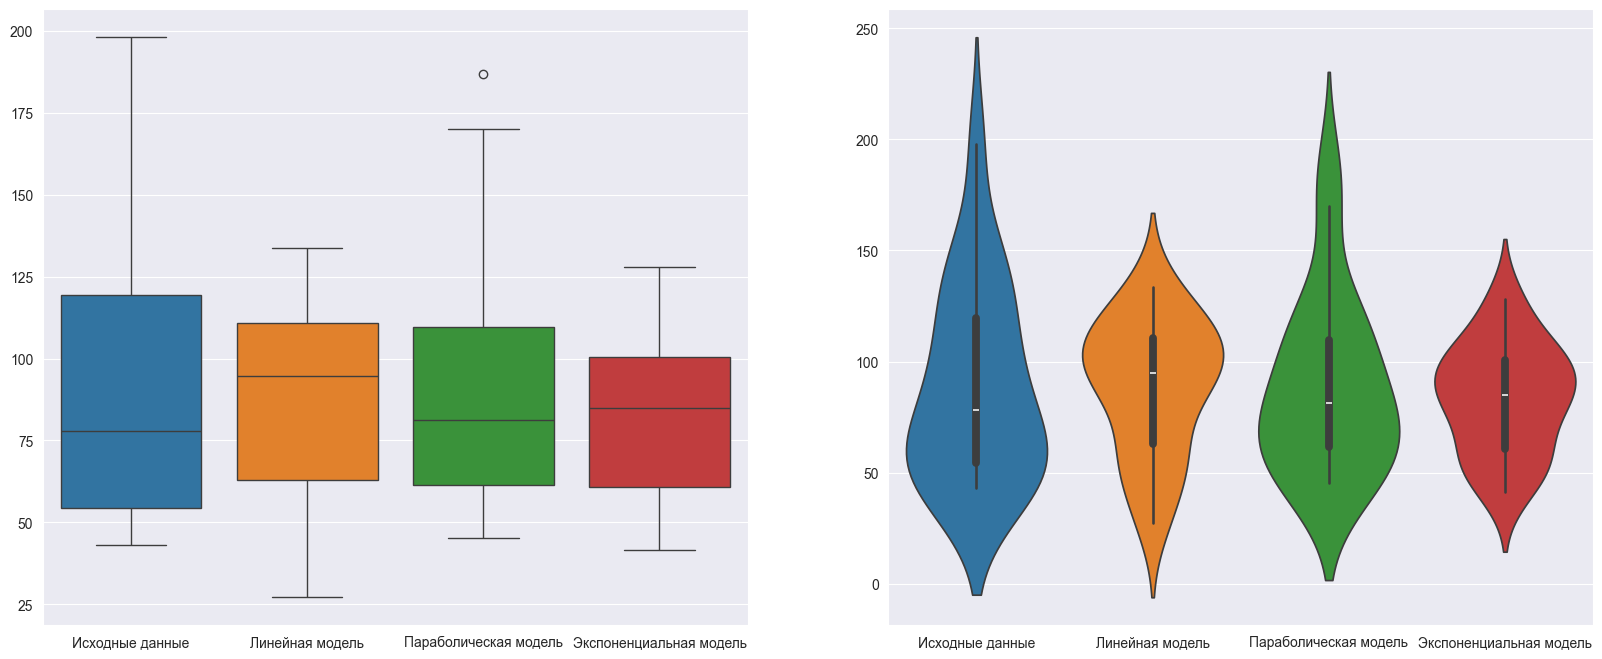

In [1162]:
_, ax = plt.subplots(1,2,figsize=(20,8))
sns.boxplot(data=predictions,ax=ax[0])
sns.violinplot(data=predictions,ax=ax[1])
plt.show()

Левая диаграмма очень похожа на исходную, но правая показывает ещё нагляднее, что ещё и распределение параболической модели очень похоже на исходную и подтверждает её выбор в качестве итоговой модели. 

### Вывод

Лучшая модель - параболическая, так как имеют наименьшие функции ошибок и наибольший коэффициент детерминации. Кроме того, box-plot и скрипичная диаграммы показывают, что она имеет наиболее совпадающее распределение с исходными данными